## Proje Özeti

Bu projede, **BigMart**’ın 2013 yılına ait mağaza ve ürün verileri kullanılarak, belirli ürünlerin satışlarını tahmin eden bir model geliştirilmesi amaçlanmaktadır. Eksik veriler uygun tekniklerle temizlenecek, model performansı ise tahmin edilen ve gerçek satışlar arasındaki **Root Mean Square Error (RMSE)** metriği ile değerlendirilecektir. Bu tahmin modeli, BigMart’ın satışlara etki eden faktörleri anlamasına ve stratejik satış artışı sağlamasına destek olacaktır.

## Değişken Açıklamaları

- **`Item_Identifier`**: Ürüne ait benzersiz kimlik (ID).  
- **`Item_Weight`**: Ürünün ağırlığı.  
- **`Item_Fat_Content`**: Ürünün yağ oranı (örn: *low fat* veya *regular*).  
- **`Item_Visibility`**: Ürünün mağazada diğer ürünlere göre ne kadar sergilendiği (% olarak ifade edilir).  
- **`Item_Type`**: Ürünün kategorisi (örn: içecek, yiyecek, temizlik malzemesi vb.).  
- **`Item_MRP`**: Ürünün maksimum perakende satış fiyatı (liste fiyatı).  
- **`Outlet_Identifier`**: Mağazaya ait benzersiz kimlik (ID).  
- **`Outlet_Establishment_Year`**: Mağazanın açıldığı yıl.  
- **`Outlet_Size`**: Mağazanın fiziksel büyüklüğü (örn: küçük, orta, büyük).  
- **`Outlet_Location_Type`**: Mağazanın bulunduğu şehrin türü (örn: kırsal, yarı kentsel, kentsel).  
- **`Outlet_Type`**: Mağazanın türü (örn: bakkal veya süpermarket).  
- **`Item_Outlet_Sales`**: Ürünün belirli bir mağazada gerçekleşen satış miktarı (tahmin edilecek hedef değişken).  


In [632]:
# Veri setlerini yükleme
train_data_path = "/kaggle/input/big-mart-sales-prediction-datasets/train.csv"
test_data_path = "/kaggle/input/big-mart-sales-prediction-datasets/test.csv"
submission_sample_path = "/kaggle/input/big-mart-sales-prediction-datasets/sample_submission.csv"

# Eğitim, test ve örnek gönderim veri setlerini okuma
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
sample_submission = pd.read_csv(submission_sample_path)

In [633]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [634]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [635]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [636]:
train_data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [637]:
train_data["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [638]:
train_data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [639]:
train_data["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [640]:
train_data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [641]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [642]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [643]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [644]:
drop_na_test_df = test_data.copy()
drop_na_test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [645]:
drop_na_df = train_data.copy()
drop_na_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [646]:
drop_na_df.drop(columns=['Item_Identifier', 'Outlet_Identifier'], inplace=True)

cat_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
drop_na_df = pd.get_dummies(drop_na_df, columns=cat_columns)

drop_na_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.920,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.500,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.200,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.930,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
8519,8.380,0.046982,108.1570,2002,549.2850,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
8520,10.600,0.035186,85.1224,2004,1193.1136,False,True,False,False,False,...,False,False,True,False,True,False,False,True,False,False
8521,7.210,0.145221,103.1332,2009,1845.5976,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False


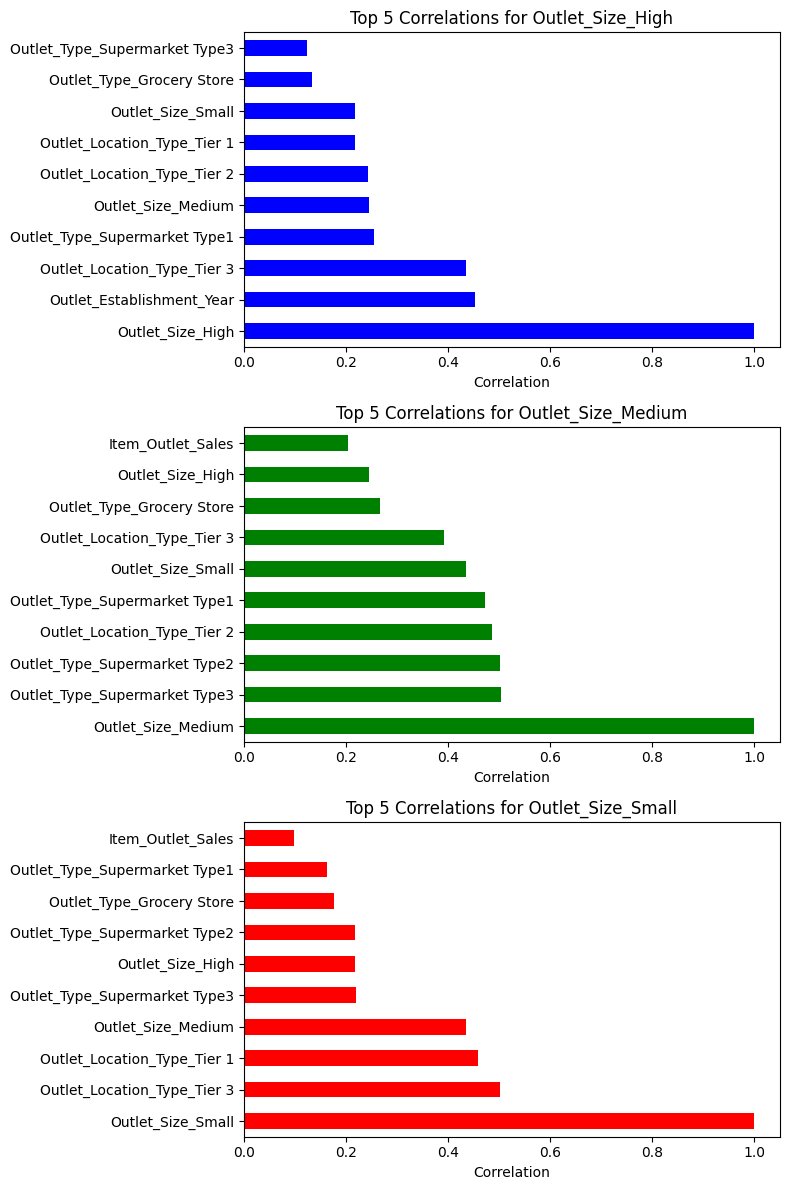

In [647]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = drop_na_df.corr()

# Outlet Size sütunları için mutlak korelasyonları sıralama
outlet_high_corr = correlation_matrix['Outlet_Size_High'].abs().sort_values(ascending=False).head(10)
outlet_medium_corr = correlation_matrix['Outlet_Size_Medium'].abs().sort_values(ascending=False).head(10)
outlet_small_corr = correlation_matrix['Outlet_Size_Small'].abs().sort_values(ascending=False).head(10)

# Her biri için grafikleri çizme
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

outlet_high_corr.plot(kind='barh', ax=axes[0], color='blue', title='Top 5 Correlations for Outlet_Size_High')
axes[0].set_xlabel('Correlation')

outlet_medium_corr.plot(kind='barh', ax=axes[1], color='green', title='Top 5 Correlations for Outlet_Size_Medium')
axes[1].set_xlabel('Correlation')

outlet_small_corr.plot(kind='barh', ax=axes[2], color='red', title='Top 5 Correlations for Outlet_Size_Small')
axes[2].set_xlabel('Correlation')

plt.tight_layout()
plt.show()


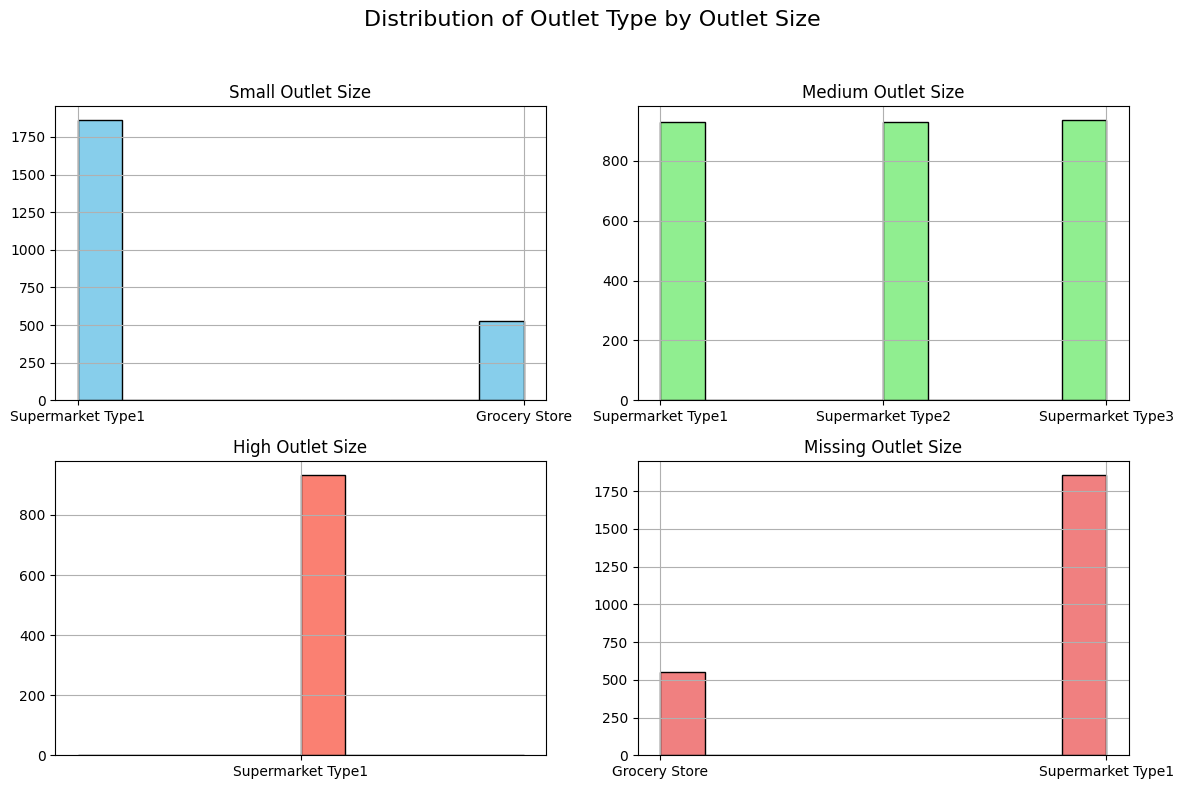

In [648]:
import matplotlib.pyplot as plt

# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribution of Outlet Type by Outlet Size', fontsize=16)

# Plot for 'Small' Outlet Size
train_data[train_data['Outlet_Size'] == 'Small']['Outlet_Type'].hist(ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Small Outlet Size')

# Plot for 'Medium' Outlet Size
train_data[train_data['Outlet_Size'] == 'Medium']['Outlet_Type'].hist(ax=axes[0, 1], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Medium Outlet Size')

# Plot for 'High' Outlet Size
train_data[train_data['Outlet_Size'] == 'High']['Outlet_Type'].hist(ax=axes[1, 0], color='salmon', edgecolor='black')
axes[1, 0].set_title('High Outlet Size')

# Plot for missing values (None) in Outlet Size
train_data[train_data['Outlet_Size'].isna()]['Outlet_Type'].hist(ax=axes[1, 1], color='lightcoral', edgecolor='black')
axes[1, 1].set_title('Missing Outlet Size')

# Adjust layout for better aesthetics
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [649]:

drop_na_test_df.drop(columns=['Item_Identifier', 'Outlet_Identifier'], inplace=True)

cat_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
drop_na_test_df = pd.get_dummies(drop_na_test_df, columns=cat_columns)

drop_na_test_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0.007565,107.8622,1999,False,True,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,8.300,0.038428,87.3198,2007,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
2,14.600,0.099575,241.7538,1998,False,True,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3,7.315,0.015388,155.0340,2007,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
4,NaN,0.118599,234.2300,1985,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,0.013496,141.3154,1997,False,False,True,False,False,False,...,False,False,True,True,False,False,False,True,False,False
5677,7.600,0.142991,169.1448,2009,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
5678,10.000,0.073529,118.7440,2002,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
5679,15.300,0.000000,214.6218,2007,False,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False


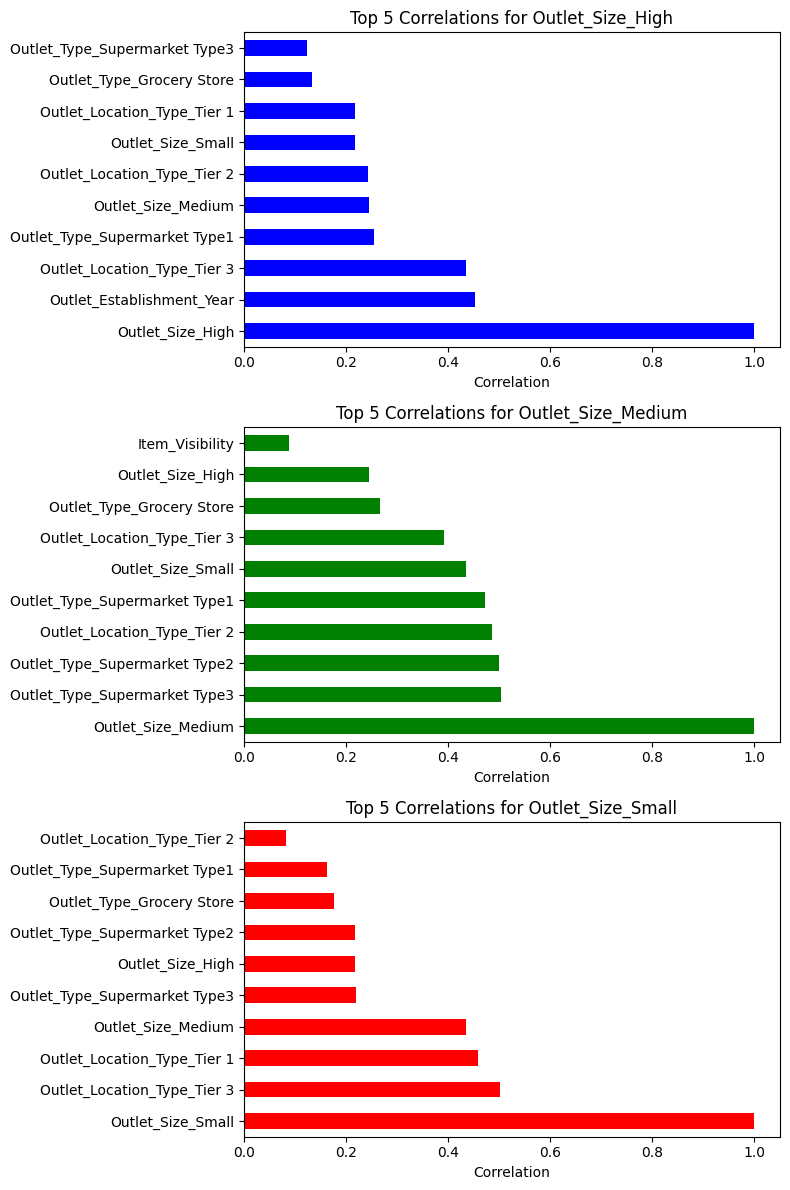

In [650]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = drop_na_test_df.corr()

# Outlet Size sütunları için mutlak korelasyonları sıralama
outlet_high_corr = correlation_matrix['Outlet_Size_High'].abs().sort_values(ascending=False).head(10)
outlet_medium_corr = correlation_matrix['Outlet_Size_Medium'].abs().sort_values(ascending=False).head(10)
outlet_small_corr = correlation_matrix['Outlet_Size_Small'].abs().sort_values(ascending=False).head(10)

# Her biri için grafikleri çizme
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

outlet_high_corr.plot(kind='barh', ax=axes[0], color='blue', title='Top 5 Correlations for Outlet_Size_High')
axes[0].set_xlabel('Correlation')

outlet_medium_corr.plot(kind='barh', ax=axes[1], color='green', title='Top 5 Correlations for Outlet_Size_Medium')
axes[1].set_xlabel('Correlation')

outlet_small_corr.plot(kind='barh', ax=axes[2], color='red', title='Top 5 Correlations for Outlet_Size_Small')
axes[2].set_xlabel('Correlation')

plt.tight_layout()
plt.show()

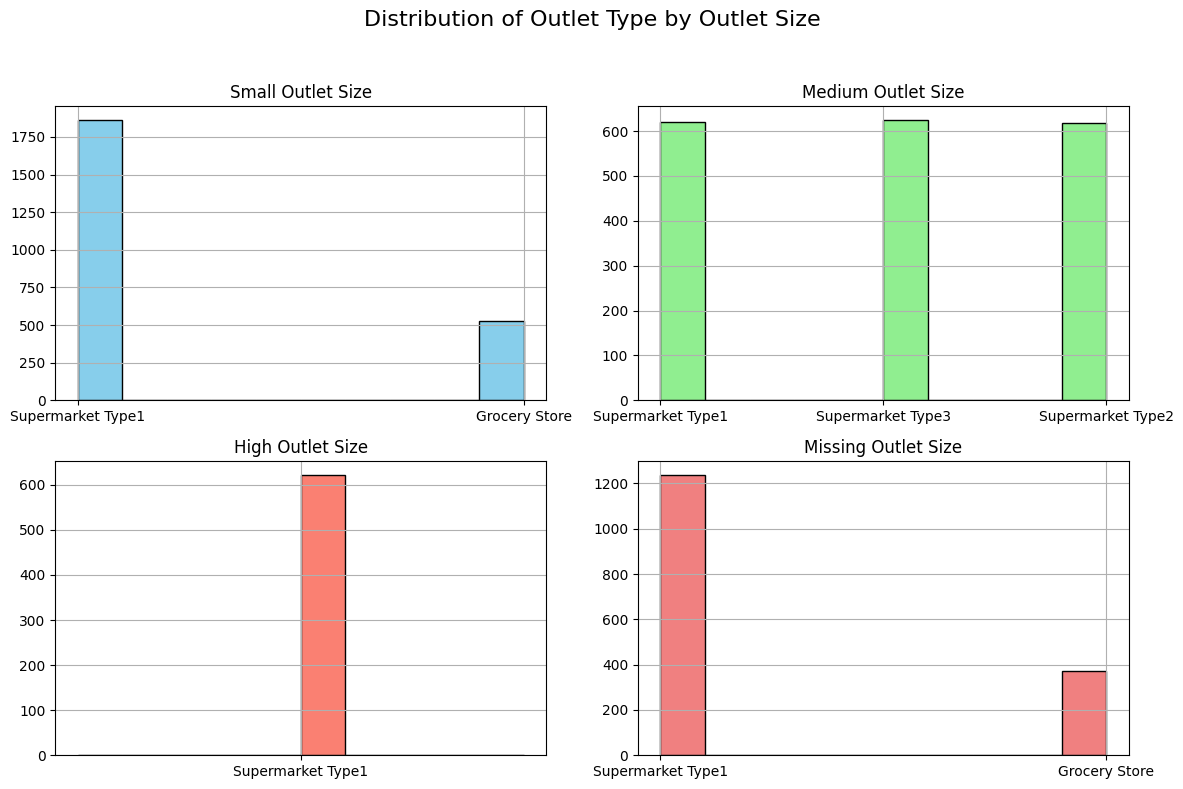

In [651]:
import matplotlib.pyplot as plt

# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribution of Outlet Type by Outlet Size', fontsize=16)

# Plot for 'Small' Outlet Size
train_data[train_data['Outlet_Size'] == 'Small']['Outlet_Type'].hist(ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Small Outlet Size')

# Plot for 'Medium' Outlet Size
test_data[test_data['Outlet_Size'] == 'Medium']['Outlet_Type'].hist(ax=axes[0, 1], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Medium Outlet Size')

# Plot for 'High' Outlet Size
test_data[test_data['Outlet_Size'] == 'High']['Outlet_Type'].hist(ax=axes[1, 0], color='salmon', edgecolor='black')
axes[1, 0].set_title('High Outlet Size')

# Plot for missing values (None) in Outlet Size
test_data[test_data['Outlet_Size'].isna()]['Outlet_Type'].hist(ax=axes[1, 1], color='lightcoral', edgecolor='black')
axes[1, 1].set_title('Missing Outlet Size')

# Adjust layout for better aesthetics
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [652]:
train_data.loc[(train_data['Outlet_Size'].isna()) & (train_data['Outlet_Type'] == 'Supermarket Type1'), 'Outlet_Size'] = 'High'
train_data.loc[(train_data['Outlet_Size'].isna()) & (train_data['Outlet_Type'] == 'Grocery Store'), 'Outlet_Size'] = 'Small'
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [653]:
test_data.loc[(test_data['Outlet_Size'].isna()) & (test_data['Outlet_Type'] == 'Supermarket Type1'), 'Outlet_Size'] = 'High'
test_data.loc[(test_data['Outlet_Size'].isna()) & (test_data['Outlet_Type'] == 'Grocery Store'), 'Outlet_Size'] = 'Small'
test_data.isna().sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [656]:
# Her iki veri setinin korelasyon matrisini hesapla
correlation_matrix_train = drop_na_df.corr()
correlation_matrix_test = drop_na_test_df.corr()

# Item_Weight ile diğer sütunlar arasındaki en yüksek mutlak korelasyonları al
outlet_small_corr_train = correlation_matrix_train['Item_Weight'].abs().sort_values(ascending=False).head(10)
outlet_small_corr_test = correlation_matrix_test['Item_Weight'].abs().sort_values(ascending=False).head(10)

# Sonuçları yazdır
print("Eğitim Veri Setindeki En Yüksek Korelasyonlar:")
print(outlet_small_corr_train)

print("\nTest Veri Setindeki En Yüksek Korelasyonlar:")
print(outlet_small_corr_test)

Eğitim Veri Setindeki En Yüksek Korelasyonlar:
Item_Weight                        1.000000
Item_Type_Breads                   0.056124
Item_Type_Soft Drinks              0.051457
Item_Type_Hard Drinks              0.051200
Item_Type_Household                0.039400
Item_Type_Dairy                    0.036142
Item_Type_Baking Goods             0.035838
Item_Type_Canned                   0.034176
Item_Type_Fruits and Vegetables    0.032474
Item_Type_Others                   0.030165
Name: Item_Weight, dtype: float64

Test Veri Setindeki En Yüksek Korelasyonlar:
Item_Weight                        1.000000
Item_Type_Breads                   0.068410
Item_Fat_Content_Low Fat           0.053775
Item_MRP                           0.049809
Item_Type_Soft Drinks              0.048671
Item_Fat_Content_Regular           0.045292
Item_Type_Household                0.043726
Item_Type_Frozen Foods             0.041776
Item_Type_Others                   0.039565
Item_Type_Fruits and Vegetables    0.

In [659]:
item_type_list_train = train_data['Item_Type'].unique().tolist()
item_type_list_train

['Dairy',
 'Soft Drinks',
 'Meat',
 'Fruits and Vegetables',
 'Household',
 'Baking Goods',
 'Snack Foods',
 'Frozen Foods',
 'Breakfast',
 'Health and Hygiene',
 'Hard Drinks',
 'Canned',
 'Breads',
 'Starchy Foods',
 'Others',
 'Seafood']

In [660]:
item_type_list_test = test_data['Item_Type'].unique().tolist()
item_type_list_test

['Snack Foods',
 'Dairy',
 'Others',
 'Fruits and Vegetables',
 'Baking Goods',
 'Health and Hygiene',
 'Breads',
 'Hard Drinks',
 'Seafood',
 'Soft Drinks',
 'Household',
 'Frozen Foods',
 'Meat',
 'Canned',
 'Starchy Foods',
 'Breakfast']

In [662]:
for type in item_type_list_train:
    train_data.loc[(train_data['Item_Weight'].isna()) & (train_data['Item_Type'] == type), 'Item_Weight'] = train_data[train_data['Item_Type'] == type]['Item_Weight'].mean()

In [663]:
for type in item_type_list_test:
    test_data.loc[(test_data['Item_Weight'].isna()) & (test_data['Item_Type'] == type), 'Item_Weight'] = test_data[test_data['Item_Type'] == type]['Item_Weight'].mean()

In [664]:
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [665]:
test_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [667]:
cat_data_corr = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Identifier', 'Outlet_Type']


correlation_matrix = train_data.drop(columns=cat_data_corr).corr()
correlation_matrix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.011620,0.025821,-0.008376,0.012088
Item_Visibility,-0.011620,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025821,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008376,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.012088,-0.128625,0.567574,-0.049135,1.000000


In [668]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


result = pd.DataFrame()

# ANOVA sonuçlarını analiz et ve bir DataFrame'e ekle
for col in cat_data_corr:
    model = ols(f'Item_Outlet_Sales ~ C({col})', data=train_data).fit()  # OLS modeli kur
    anova_table = sm.stats.anova_lm(model, typ=2)  # ANOVA testini yap
    
    # ANOVA tablosuna kolon ismini ekle ve sonuçları birleştir
    anova_table['Variable'] = col
    result = pd.concat([result, anova_table])

result

,sum_sq,df,F,PR(>F),Variable
C(Item_Identifier),1.059793e+10,1558.0,3.331446,1.273531e-252,Item_Identifier
Residual,1.421934e+10,6964.0,NaN,NaN,Item_Identifier
C(Item_Fat_Content),2.009519e+07,4.0,1.725709,1.412215e-01,Item_Fat_Content
Residual,2.479717e+10,8518.0,NaN,NaN,Item_Fat_Content
C(Item_Type),1.176182e+08,15.0,2.700653,3.884399e-04,Item_Type
Residual,2.469965e+10,8507.0,NaN,NaN,Item_Type
C(Outlet_Size),1.666775e+09,2.0,306.708812,2.369991e-129,Outlet_Size
Residual,2.315049e+10,8520.0,NaN,NaN,Outlet_Size
C(Outlet_Location_Type),3.103504e+08,2.0,53.947740,5.222817e-24,Outlet_Location_Type
Residual,2.450691e+10,8520.0,NaN,NaN,Outlet_Location_Type


In [ ]:
train_data

In [ ]:
train_data['Outlet_Size'].value_counts()

In [ ]:
#for type in item_type_list:
#    test_data.loc[(test_data['Item_Weight'].isna()) & (test_data['Item_Type'] == type), 'Item_Weight'] = test_data[test_data['Item_Type'] == type]['Item_Weight'].mean()

#test_data.loc[(test_data['Outlet_Size'].isna()) & (test_data['Outlet_Type'] == 'Supermarket Type1'), 'Outlet_Size'] = 'High'
#test_data.loc[(test_data['Outlet_Size'].isna()) & (test_data['Outlet_Type'] == 'Grocery Store'), 'Outlet_Size'] = 'Small'

In [ ]:
size_mapping = {'Small': 0, 'Medium': 1, 'High': 2}

train_data['Outlet_Size'] = train_data['Outlet_Size'].map(size_mapping)
test_data['Outlet_Size'] = test_data['Outlet_Size'].map(size_mapping)

In [ ]:
test_data

In [ ]:
train_data